# Lecture 1.3: Data Frames & Graphics

## Data Frames  

* Data frames provide a way of grouping a number of related variables into a single data object.  

* The function 'data.frame' takes a number of vectors and/or factors and returns a single object containing all the variables

* Data frames are stored as a list of variables

In [31]:
gender = factor(rep(c("female", "male"), c(4, 4)))
hgt = c(165, 176, 171, 177, 176, 193, 180, 193)
classinfo = data.frame(gender, hgt)
classinfo

,gender,hgt
1,female,165
2,female,176
3,female,171
4,female,177
5,male,176
6,male,193
7,male,180
8,male,193


In [32]:
head(classinfo)

,gender,hgt
1,female,165
2,female,176
3,female,171
4,female,177
5,male,176
6,male,193


In [33]:
tail(classinfo)

,gender,hgt
3,female,171
4,female,177
5,male,176
6,male,193
7,male,180
8,male,193


In [70]:
# Summarize the data

summary(classinfo)

    gender       hgt       
 female:4   Min.   :165.0  
 male  :4   1st Qu.:174.8  
            Median :176.5  
            Mean   :178.9  
            3rd Qu.:183.2  
            Max.   :193.0  

In [36]:
# To find the documentation of a function

?data.frame

In [37]:
# To get a reminder of the arguments we need to pass in

args(data.frame)

function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, 
    fix.empty.names = TRUE, stringsAsFactors = default.stringsAsFactors()) 
NULL

In [39]:
# To see examples using the function

example(data.frame)


dt.frm> L3 <- LETTERS[1:3]

dt.frm> fac <- sample(L3, 10, replace = TRUE)

dt.frm> (d <- data.frame(x = 1, y = 1:10, fac = fac))
   x  y fac
1  1  1   B
2  1  2   C
3  1  3   C
4  1  4   A
5  1  5   C
6  1  6   A
7  1  7   A
8  1  8   B
9  1  9   C
10 1 10   C

dt.frm> ## The "same" with automatic column names:
dt.frm> data.frame(1, 1:10, sample(L3, 10, replace = TRUE))
   X1 X1.10 sample.L3..10..replace...TRUE.
1   1     1                              B
2   1     2                              C
3   1     3                              B
4   1     4                              B
5   1     5                              B
6   1     6                              C
7   1     7                              B
8   1     8                              C
9   1     9                              C
10  1    10                              B

dt.frm> is.data.frame(d)
[1] TRUE

dt.frm> ## do not convert to factor, using I() :
dt.frm> (dd <- cbind(d, char = I(letters[1:10])))
   x  y fac char
1

### Factors  

* In R, categorical variables are typically represented as 'factors'  

* The function 'factor' is used to create factors

* The categories are defined as 'levels'; by default, the levels are sorted into ascending order

* If the categorical variable is ordered, we create a ordered factor using 'ordered'

In [41]:
# Create a factor to represent gender

gender = factor(rep(c("female", "male"), c(4, 4)))
print(gender)

[1] female female female female male   male   male   male  
Levels: female male


In [42]:
# You can specify the order of the levels

gender = factor(rep(c("female", "male"), c(4, 4)),
                levels = c("male", "female"))
print(gender)

[1] female female female female male   male   male   male  
Levels: male female


In [24]:
# To obtains the levels/ categories of the data

levels(gender)

[1] "M" "F"

In [25]:
# Create an ordered factor

size = ordered(c("large", "medium", "medium",
                 "small", "medium", "large"),
               levels = c("small", "medium",
                          "large"))
print(size)

[1] large  medium medium small  medium large 
Levels: small < medium < large


In [26]:
# To check if a variable is a factor

is.factor(gender)

[1] TRUE

In [30]:
is.factor(size)

[1] TRUE

In [28]:
is.ordered(gender)

[1] FALSE

In [29]:
is.ordered(size)

[1] TRUE

### Tabulation 

* We can create frequency tables based on the number of times each level occurs

In [34]:
table(gender)

gender
female   male 
     4      4 

* 'table' can also be used to create contingency tables when there are two or more factors

### Summary by Factor Levels

In [48]:
tapply(hgt, gender, mean)

male female 
185.50 172.25

In [49]:
?tapply

### Subsetting a Data Frame

In [52]:
classinfo$hgt

[1] 165 176 171 177 176 193 180 193

In [53]:
classinfo$gender

[1] female female female female male   male   male   male  
Levels: female male

In [55]:
tapply(classinfo$hgt, classinfo$gender, mean)

female   male 
172.25 185.50

In [58]:
# To save the trouble typing out the table name 
with(classinfo, tapply(hgt, gender, mean))

female   male 
172.25 185.50

In [62]:
# Extract the subset of males who are taller than 190cm
mt = subset(classinfo, gender == "male" & hgt > 190)
mt

,gender,hgt
6,male,193
8,male,193


In [50]:
# We can treat it as a matrix, but this should be AVOIDED!
classinfo[c(1,3,5,7), ]

,gender,hgt
1,female,165
3,female,171
5,male,176
7,male,180


In [51]:
# We can treat it as a matrix, but this should be AVOIDED!
classinfo[,1]

[1] female female female female male   male   male   male  
Levels: female male

### Transform Variables in a Data Frame

In [60]:
nclass = transform(classinfo, hgt2 = hgt^2)
nclass

,gender,hgt,hgt2
1,female,165,27225
2,female,176,30976
3,female,171,29241
4,female,177,31329
5,male,176,30976
6,male,193,37249
7,male,180,32400
8,male,193,37249


In [64]:
# Select cases where hgt > 175 for the variables hgt2 and gender
subset(nclass, hgt > 175, select = c(hgt2, gender))

,hgt2,gender
2,30976,female
4,31329,female
5,30976,male
6,37249,male
7,32400,male
8,37249,male


### Sorting Data Frames

In [65]:
o = order(classinfo$hgt)
classinfo[o,]

,gender,hgt
1,female,165
3,female,171
2,female,176
5,male,176
4,female,177
7,male,180
6,male,193
8,male,193


### Reading Data

* read.table
* read.csv
* read.delim

**Exercise**: There are many interesting built-in datasets in the 'datasets' package as well as other packages, find a dataset you like and explore that dataset.

* Use 'data()' to get the list of datasets

In [79]:
# To get the list of built-in datasets in the 'datasets' package
data()

In [82]:
# To get more information about a dataset
help(AirPassengers)

In [83]:
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

In [75]:
# To see a list of dataset in another library
data(package = "MASS")

In [78]:
# To access a dataset in MASS
data(Cars93, package = "MASS")
summary(Cars93)

    Manufacturer     Model         Type      Min.Price         Price      
 Chevrolet: 8    100    : 1   Compact:16   Min.   : 6.70   Min.   : 7.40  
 Ford     : 8    190E   : 1   Large  :11   1st Qu.:10.80   1st Qu.:12.20  
 Dodge    : 6    240    : 1   Midsize:22   Median :14.70   Median :17.70  
 Mazda    : 5    300E   : 1   Small  :21   Mean   :17.13   Mean   :19.51  
 Pontiac  : 5    323    : 1   Sporty :14   3rd Qu.:20.30   3rd Qu.:23.30  
 Buick    : 4    535i   : 1   Van    : 9   Max.   :45.40   Max.   :61.90  
 (Other)  :57    (Other):87                                               
   Max.Price       MPG.city      MPG.highway                  AirBags  
 Min.   : 7.9   Min.   :15.00   Min.   :20.00   Driver & Passenger:16  
 1st Qu.:14.7   1st Qu.:18.00   1st Qu.:26.00   Driver only       :43  
 Median :19.6   Median :21.00   Median :28.00   None              :34  
 Mean   :21.9   Mean   :22.37   Mean   :29.09                          
 3rd Qu.:25.3   3rd Qu.:25.00   3rd Qu.:

## Graphics

* R has a number of functions that produce graphics

* Some functions draw an entire graph with a single function call; they are called high-level graphics functions

* Other graphics functions are used to build up graphs incrementally; they are called low-level graphics functions

### The 'plot' Function 

* The most basic plotting function

* It takes a set of x and y coordinates and produces a plot based on those coordinates

* The simplest plot is a simple scatterplot, but optional arguments make it possible to produce a variety of different plot styles  

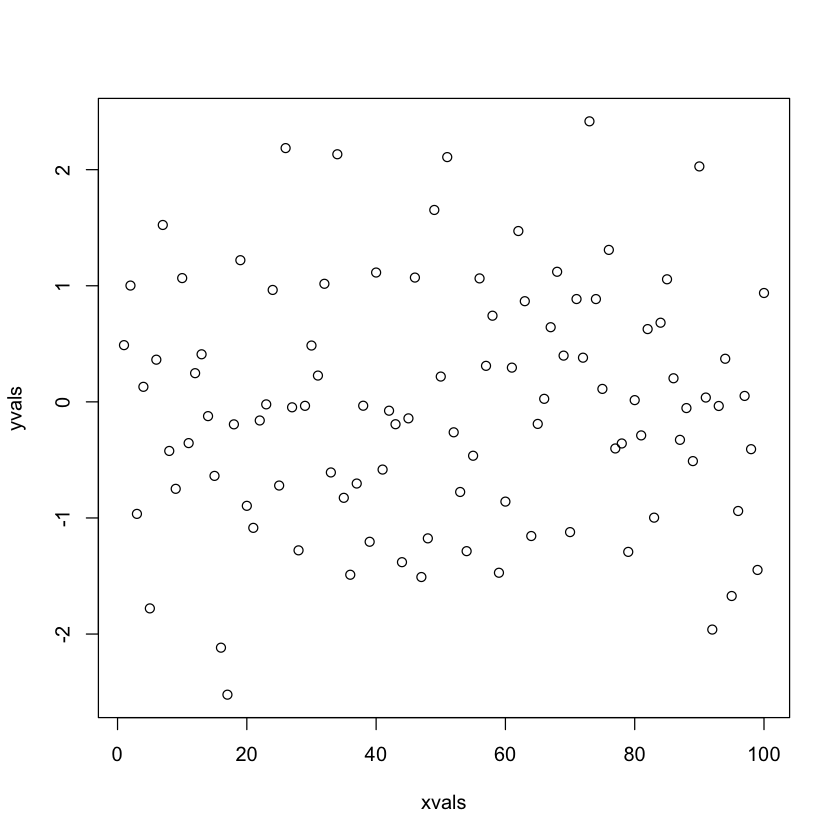

In [84]:
xvals = 1:100
yvals = rnorm(100)
plot(xvals, yvals)

**Exercise**: Plot the data you were exploring in the previous exercise.

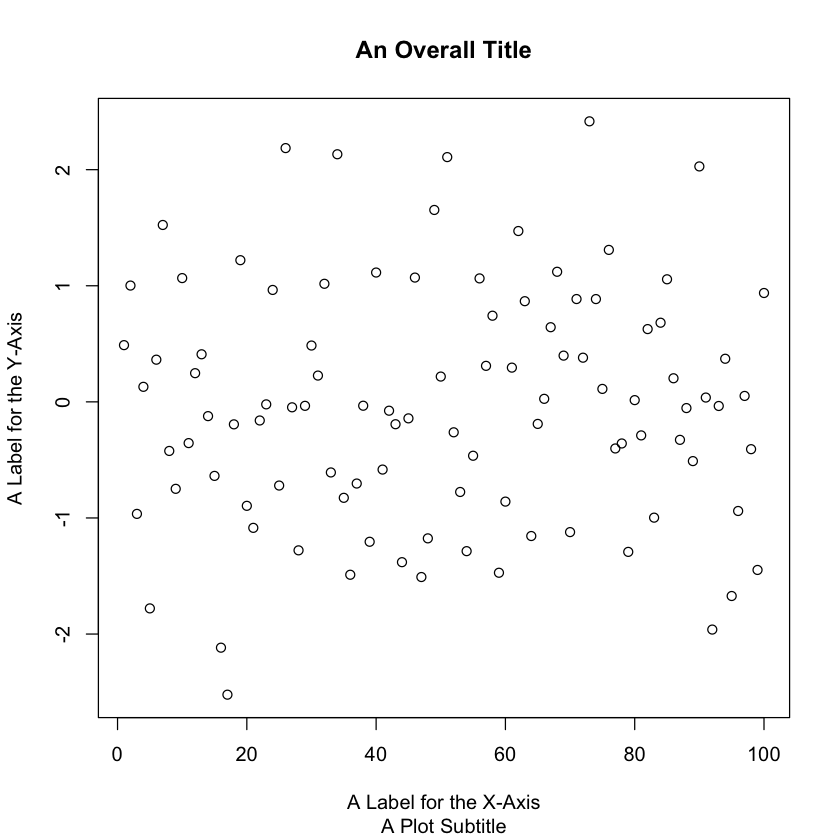

In [85]:
# Customize labels

plot(xvals, yvals,
     main = "An Overall Title",
     xlab = "A Label for the X-Axis",
     ylab = "A Label for the Y-Axis",
     sub = "A Plot Subtitle")

**Exercise**: Label your plot.

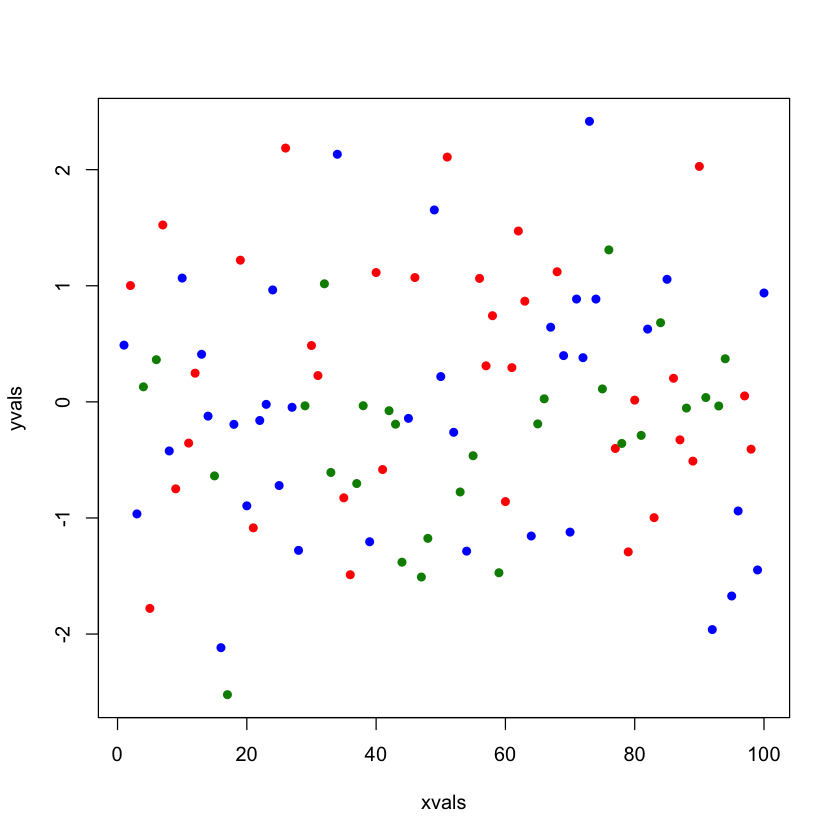

In [86]:
# Customize plotting symbol and colors

cols = sample(c("red", "green4", "blue"),
              length(xvals), replace = TRUE)
plot(xvals, yvals, pch = 16, col = cols)

**Exercise**: Plot your data with different plotting symbols and colors.

### Different Types of Plot  

* By default, the plot function produces a scatterplot

* The optional 'type' argument makes it possible to produce other types of plot   

* The plot types are:
    * "p" points (i.e. a scatterplot)
    * "l" lines (i.e. a line plot)
    * "b" both (points and lines)
    * "c" just the lines from type="b"
    * "o" points and lines overplotted
    * "h" high-density needles
    * "s" step function, horizontal step first
    * "S" step function, vertical step first
    * "n" nothing (i.e. no plot contents)

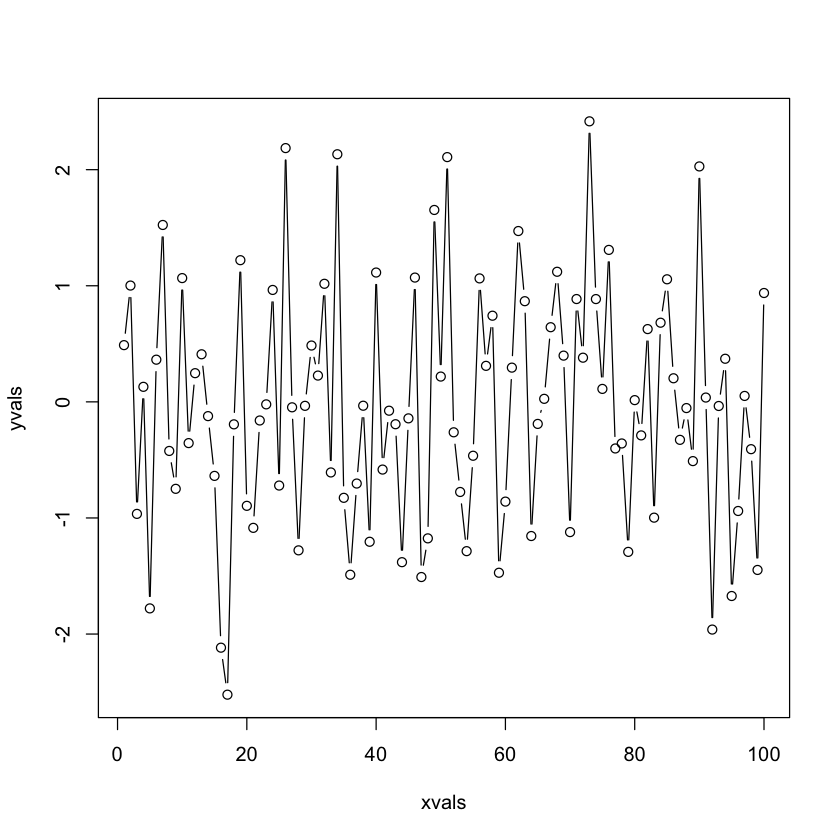

In [96]:
plot(xvals, yvals, type = "b")

**Exercise**: Try out all the different plotting types and see what they look like.

### Line Types  

* The line type can be specified with an argument of the form 'lty=type'  

* One way to specify the line type is to use these names: "solid", "dashed", "dotted", "dotdash", "longdash", "twodash"

* Line thickness can be set with 'lwd=w'

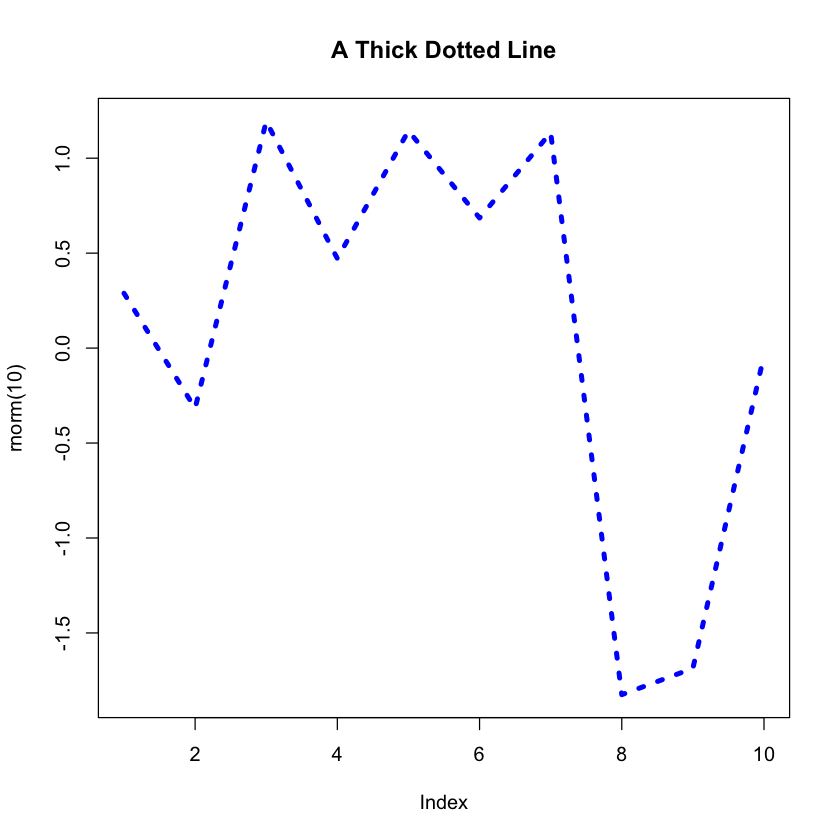

In [100]:
plot(rnorm(10), type="l",
     lwd=4, lty="dotted", col="blue",
     main = "A Thick Dotted Line")

### Controlling Axis Limits

* The plot arguments xlim and ylim supply two values which are use to determine the limits on the x and y axes

* By default the range between the limits is expanded by 8% so that points near the edge of the plot do not overlap the edges

* This can be changed by specifying 'xaxs="i"' or 'yaxs="i"' to prevent the expansion

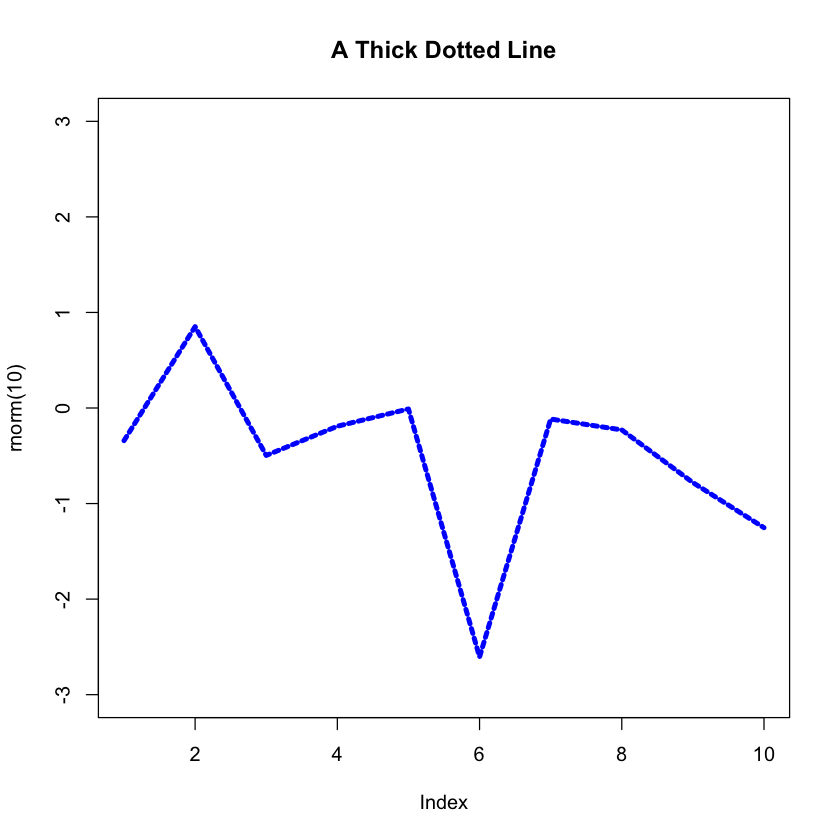

In [101]:
plot(rnorm(10), type="l",
     ylim = c(-3, 3),
     lwd=4, lty="1111", col="blue",
     main = "A Thick Dotted Line")

### Adding to Plots  

* Once a plot is created, we can add additional graphical information with a variety of low-level functions
    * 'points': draw points
    * 'lines': draw connected line segments
    * 'abline': add a straight line to a plot
    * 'segments': draw disconnected line segments
    * 'arrows': add arrows to a plot
    * 'rect': add rectangles to a plot
    * 'polygon': add polygons to a plot
    * 'text': add text to a plot

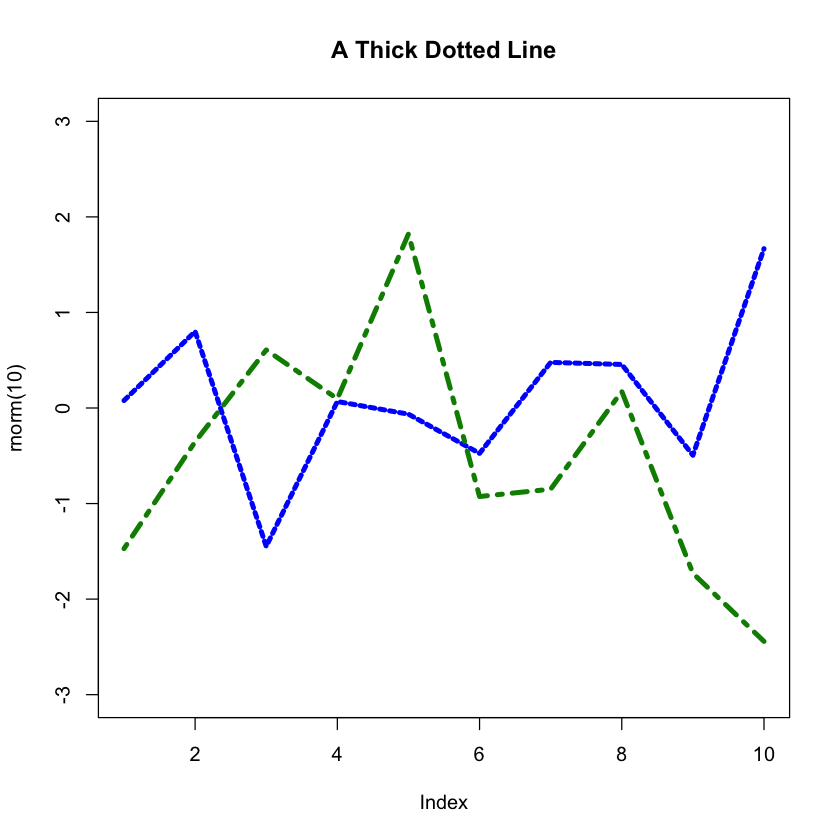

In [103]:
plot(rnorm(10), type="l",
     ylim = c(-3, 3),
     lwd=4, lty="1111", col="blue",
     main = "A Thick Dotted Line")
lines(rnorm(10), type = "l",
      lwd = 4, lty="1232", col = "green4")

### Boxplot  

In [104]:
# randomly generate 5 groups of 20 observations each
groups = rep(1:5, each = 20)
means = c(5, 7, 6, 9, 8)
y = rnorm(100) + rep(means, each = 20)

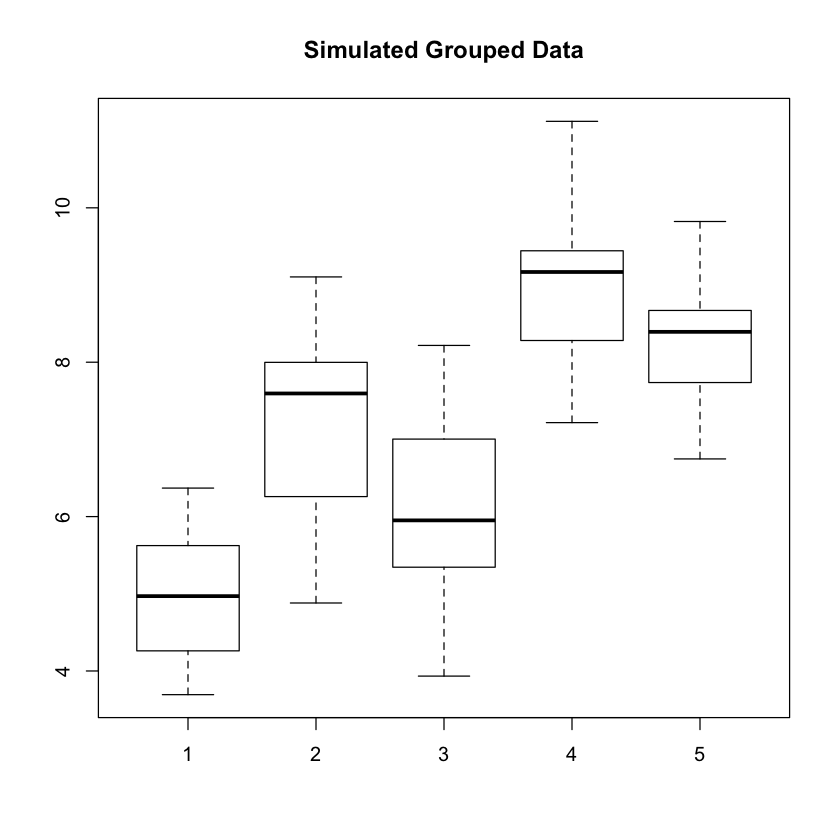

In [105]:
# Plot side-by-side boxplots
boxplot(y ~ groups, main = "Simulated Grouped Data")

* A customized alternative

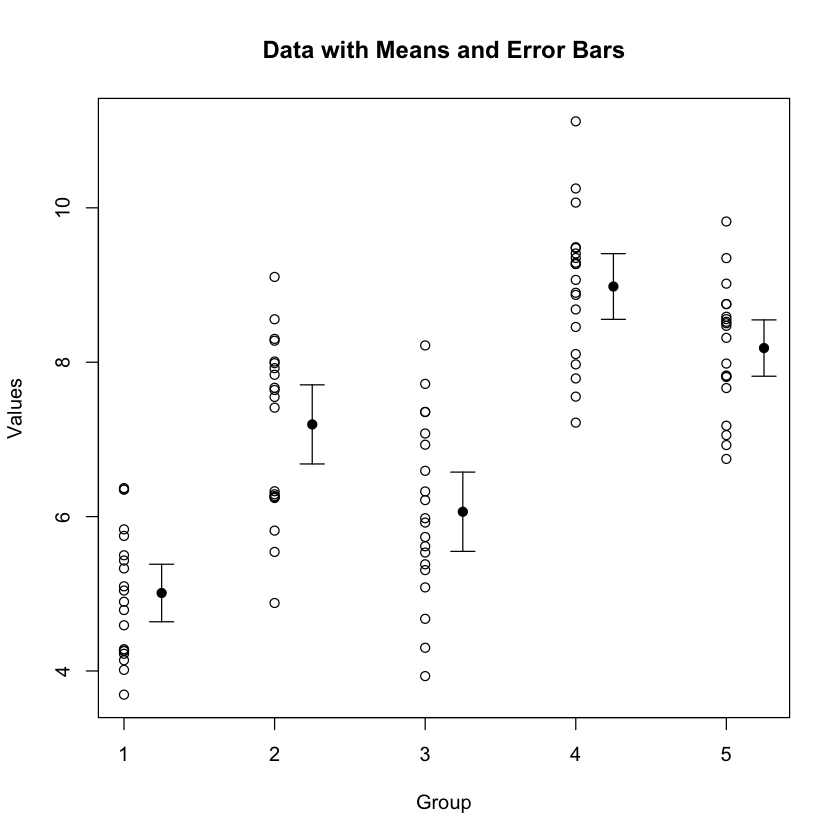

In [106]:
ybar = sapply(split(y, groups), mean)
ysd = sapply(split(y, groups), sd)
plot(groups, y, xlim = c(1, 5.25),
     xlab = "Group", ylab = "Values",
     main = "Data with Means and Error Bars")
points(1:5 + .25, ybar, pch=19)
arrows(1:5 + .25, ybar - 2 * ysd/sqrt(20),
       1:5 + .25, ybar + 2 * ysd/sqrt(20),
       code = 3, angle = 90, length = .1)

### Area Fill Primitives

* The graphical primitives 'rect' and 'polygon' can be used to draw coloured areas  

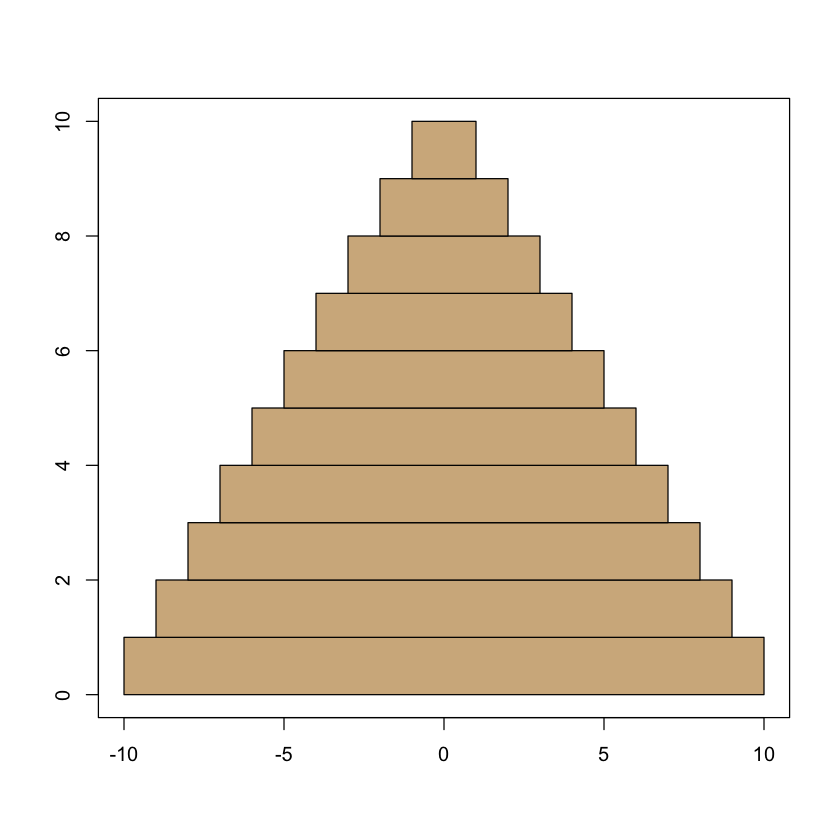

In [109]:
# Create 10 rectangles, going bottom to top
plot(c(-10, 10), c(0, 10), type = "n",
     ylab = "", xlab = "")
xl = -(10:1)
xr = 10:1
yb = 0:9
yt = 1:10
rect(xl, yb, xr, yt, col = "tan")

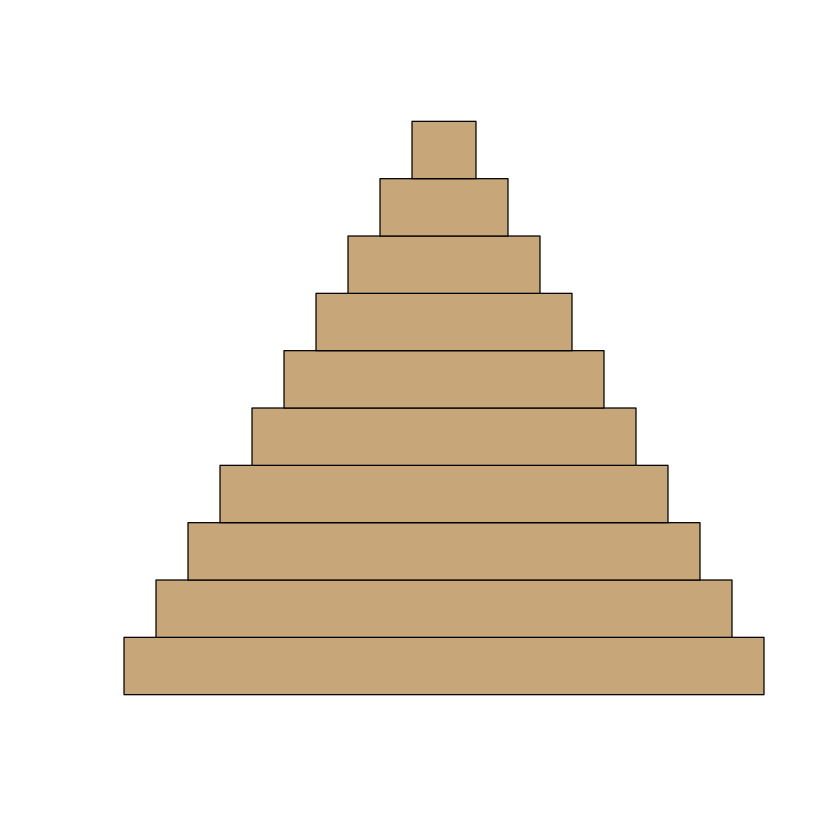

In [110]:
# Drop the axes from the plot

plot(c(-10, 10), c(0, 10), type = "n",
     axes = FALSE,
     ylab = "", xlab = "")
rect(-(10:1), 0:9, 10:1, 1:10, col = "tan")

**Exercise**: Produce a plot that looks like this:  

<img src="images/rect.png" width="700">

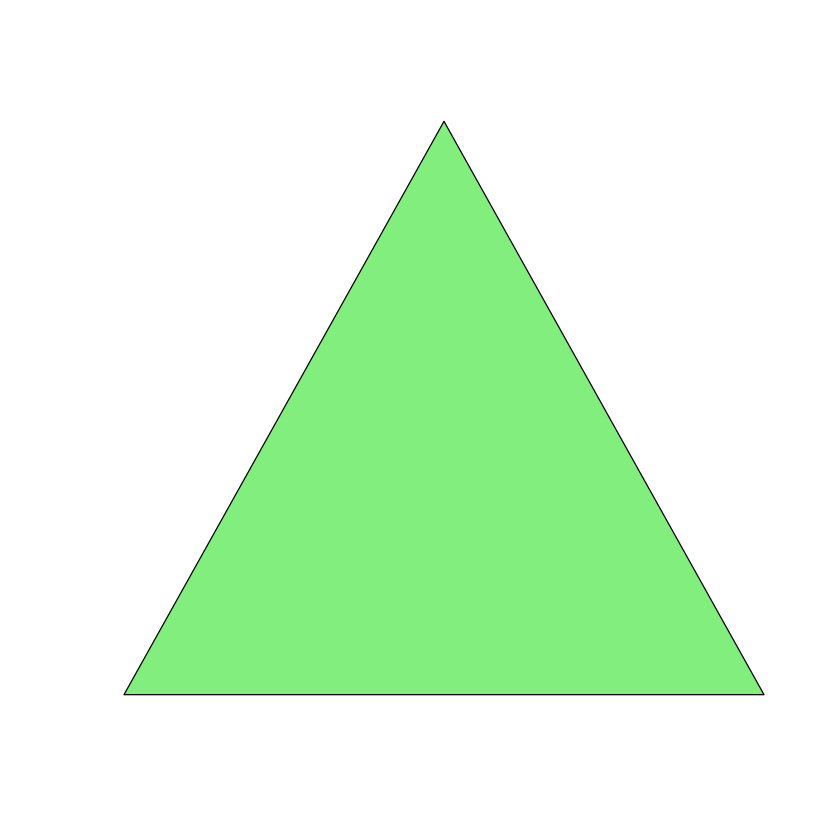

In [133]:
# Create simple polygon
plot(c(-10, 10), c(0, 10), type = "n",
     axes = FALSE,
     ylab = "", xlab = "")
polygon(c(-10, 0, 10), c(0, 10, 0), col = "lightgreen")

**Exercise**: try to create the polygon below.  

<img src="images/polygon.png" width="700">

### Another example using 'polygon'

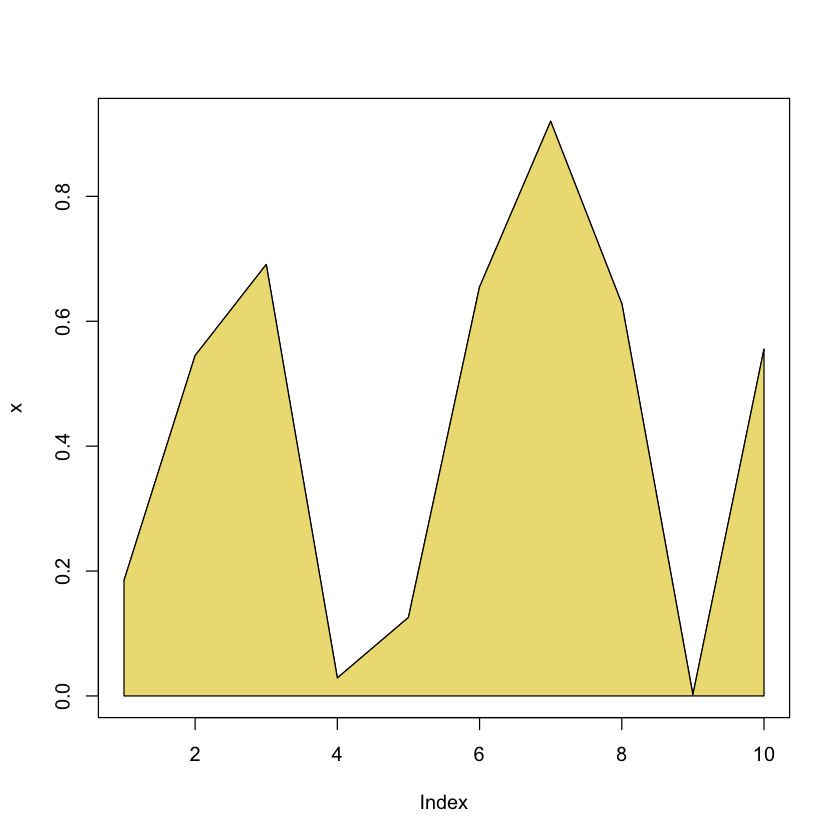

In [130]:
# Fill the area under lines
x = runif(10)
plot(x, type="l")
polygon(c(1, 1:10, 10),
        c(0, x, 0), col = "lightgoldenrod")

### Pie Chart

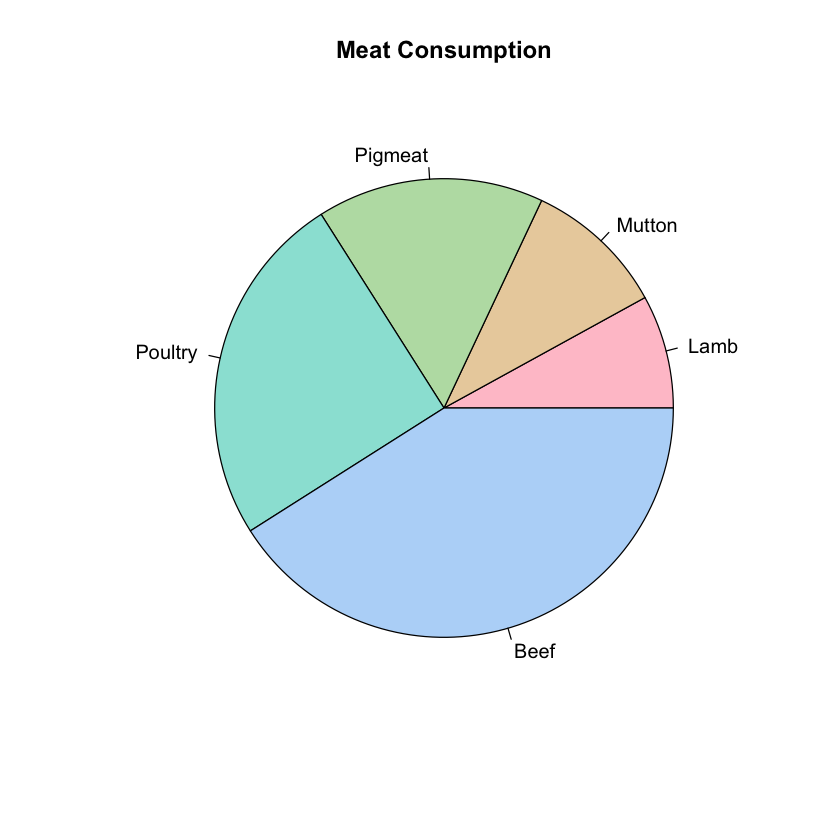

In [136]:
# An example of making a pie chart

# Create a simple set of data
meat = c(8, 10, 16, 25, 41)
names(meat) = c("Lamb",
                "Mutton",
                "Pigmeat",
                "Poultry",
                "Beef")

# A special way of specifying colors
# by the angle (in degrees) around the
# colour circle (0 = red, 60 = yellow, 
# 120 = green, 180 = cyan, 240 = blue, 
# 300 = magenta).
cols = hcl(seq(0, 240, by = 60))
pie(meat,
    main = "Meat Consumption",
    col = cols)

### Bar Chart

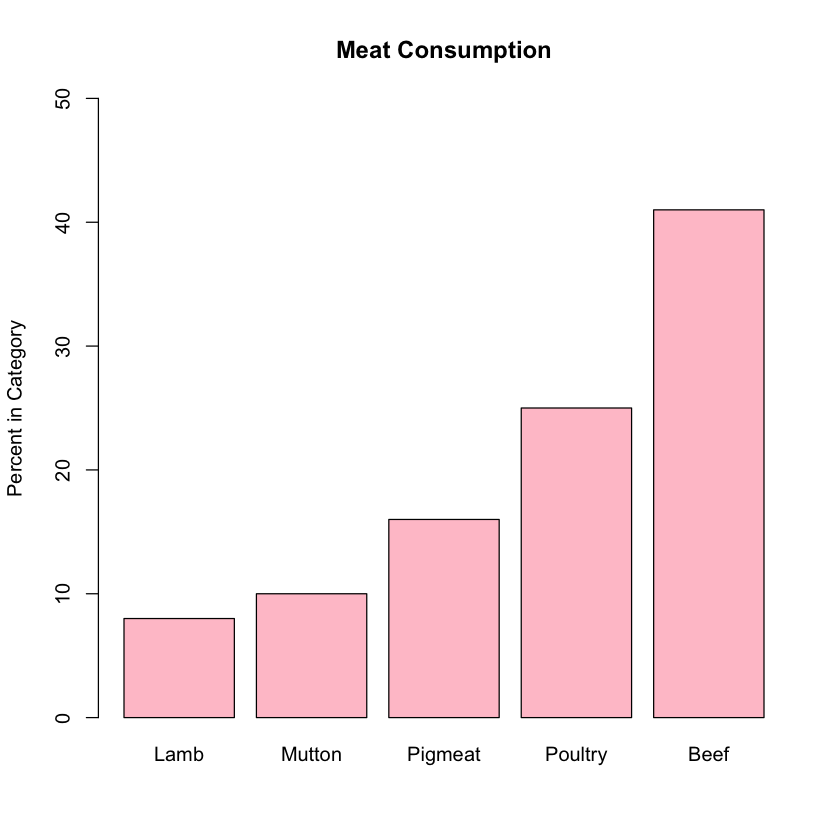

In [137]:
barplot(meat, ylim = c(0, 50),
        col = hcl(0),
        main = "Meat Consumption",
        ylab = "Percent in Category")

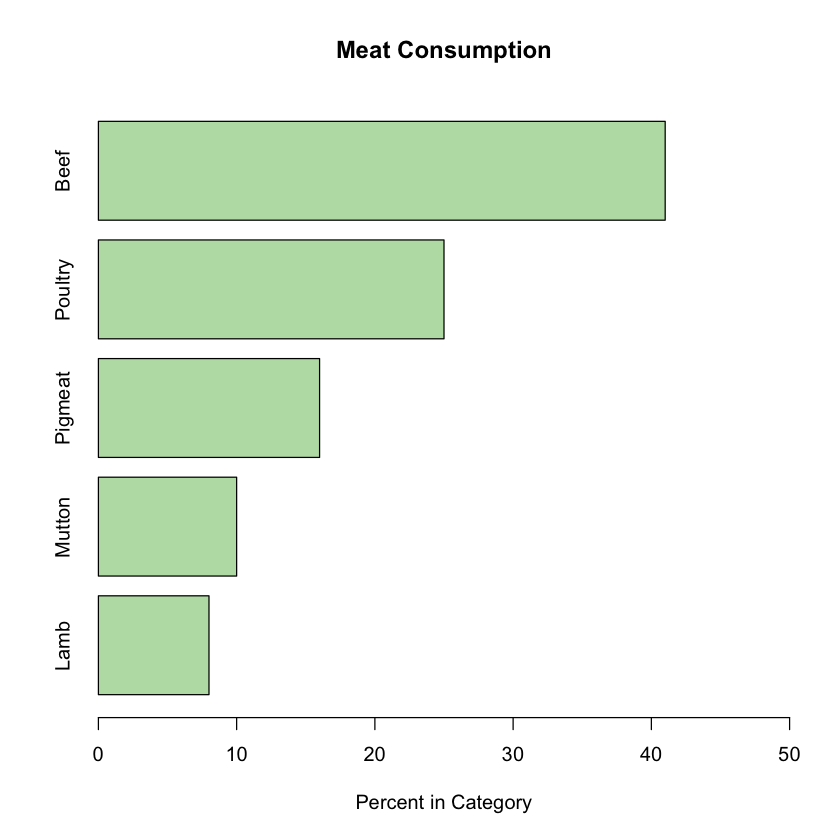

In [138]:
# We can make it horizontal

barplot(meat, xlim = c(0, 50),
        col = hcl(120),
        main = "Meat Consumption",
        xlab = "Percent in Category",
        horiz = TRUE)

### Dotchart

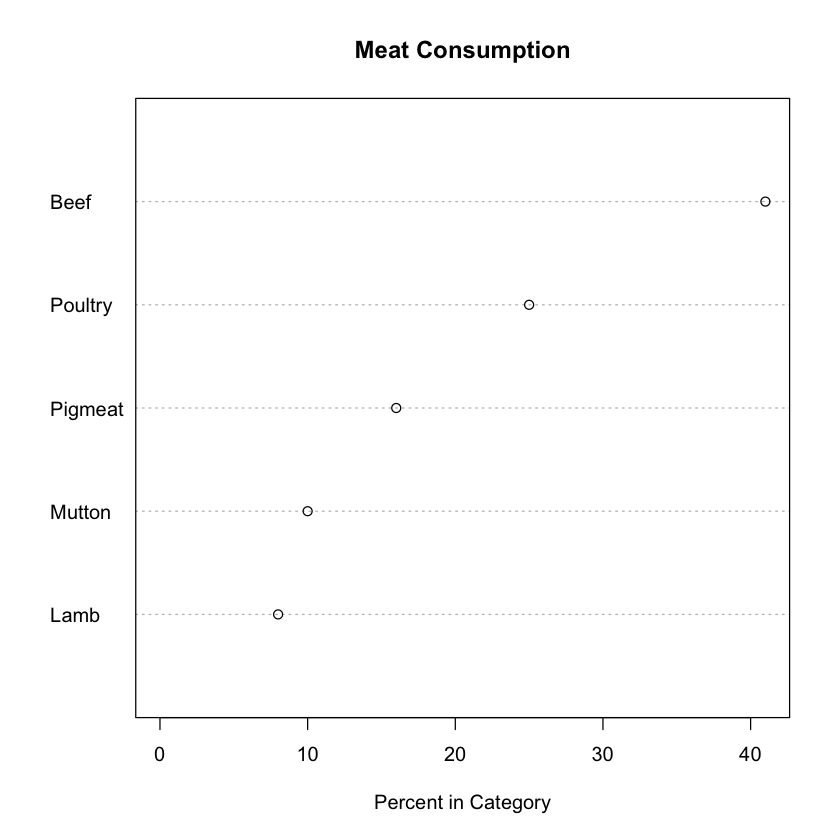

In [139]:
dotchart(meat, xlim = range(0, meat),
         main = "Meat Consumption",
         xlab = "Percent in Category")

**Exercise**: 

1) The following data shows the size of the New Zealand population, broken down by gender over the period 1926–2014. Create a data frame to group all the data together.

In [134]:
year = 1926:2014

femalepop =
    c(699200, 709900, 718700, 728300, 738900, 747100, 753800, 
      760800, 766400, 773000, 780300, 788700, 796600, 808800, 
      820600, 832000, 842700, 851200, 862700, 872300, 889900, 
      907400, 924600, 942600, 960400, 981000, 1006700, 1031600, 
      1053000, 1075700, 1098000, 1125000, 1150400, 1173700, 1195700, 
      1223300, 1251700, 1278500, 1304000, 1327100, 1351000, 1371400, 
      1387600, 1404200, 1426700, 1451100, 1481900, 1514900, 1548000, 
      1576100, 1585300, 1588000, 1589300, 1590100, 1594900, 1607600, 
      1624900, 1644100, 1660800, 1666300, 1674300, 1689200, 1695500, 
      1710100, 1728500, 1786000, 1803100, 1825400, 1850400, 1878700, 
      1906900, 1929700, 1945900, 1959500, 1972600, 1995700, 2032900, 
      2069800, 2098100, 2123300, 2149500, 2169000, 2187000, 2213000, 
      2234700, 2248300, 2262000, 2285600, 2320300)

malepop =
    c(730500, 740500, 748600, 757800, 767900, 775600, 780900, 
      786400, 792000, 796700, 804300, 813100, 821700, 832800, 
      813000, 799200, 793700, 790800, 813600, 855500, 891300, 
      910100, 929300, 949500, 967300, 989500, 1017900, 1043100, 
      1065400, 1089100, 1111200, 1137800, 1165600, 1186000, 1207900, 
      1238000, 1264100, 1288400, 1313000, 1336700, 1360300, 1373600, 
      1385400, 1399800, 1425400, 1447400, 1477800, 1510000, 1543900, 
      1567600, 1578100, 1578400, 1575900, 1573800, 1581500, 1586900, 
      1601900, 1620700, 1632200, 1636800, 1639200, 1652900, 1649700, 
      1659700, 1681900, 1730000, 1749100, 1772500, 1797800, 1828000, 
      1855400, 1872900, 1883300, 1891700, 1900400, 1920500, 1956700, 
      1991800, 2016200, 2037700, 2059600, 2076800, 2093300, 2119200, 
      2139200, 2151100, 2163800, 2190200, 2234200)

2) The following plot shows the “excess number of females per hundred males” in the New
Zealand population. Write some R code that produces this plot as close to exactly as it appears in this plot
as you can get it.  

<img src="images/nzpop.png" width="700">